In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)
coordinates

[(-21.466716172048322, 39.97922755394907),
 (-20.80157042242479, 123.27599785793768),
 (-6.812404196424538, -106.81913150336199),
 (-36.78983128609782, 113.11378561152696),
 (-65.6310424991479, -95.06128578672747),
 (-59.618380709707026, -12.448871061695144),
 (26.373059954545894, 93.1929185498633),
 (11.141113544802067, -28.646995864672675),
 (13.130919076872857, -0.343727073472877),
 (-26.464328214180505, -133.97028529697005),
 (-54.30789214727054, -57.61636439588523),
 (-46.13329902035355, 53.68174186544172),
 (34.14527939926563, -15.317375208262092),
 (-18.91110403816272, 44.25481427373475),
 (29.386767363611682, 32.665662038596025),
 (-37.214210839472194, 71.51468788558921),
 (-56.681294556923895, -46.68844154745494),
 (64.53586549646442, -93.05251391049428),
 (53.733034696168204, -158.87948876465987),
 (11.653484067358235, 110.66129824861406),
 (-55.093646287434346, 71.96860765487256),
 (-27.39268378690643, -104.46068545413901),
 (-73.42220128899515, 154.745923866917),
 (-83.3980

In [4]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

607

In [6]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4bca05dc20577de1febcac60150c6315"

# Import the datetime module from the datetime library.
from datetime import datetime

In [7]:
# Create an empty list to hold the weather data.
city_data = []

# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")


Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | toliary
City not found. Skipping...
Processing Record 2 of Set 1 | broome
Processing Record 3 of Set 1 | puerto ayora
Processing Record 4 of Set 1 | busselton
Processing Record 5 of Set 1 | punta arenas
Processing Record 6 of Set 1 | cape town
Processing Record 7 of Set 1 | tezpur
Processing Record 8 of Set 1 | sao filipe
Processing Record 9 of Set 1 | bogande
Processing Record 10 of Set 1 | rikitea
Processing Record 11 of Set 1 | ushuaia
Processing Record 12 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 13 of Set 1 | camacha
Processing Record 14 of Set 1 | miandrivazo
Processing Record 15 of Set 1 | suez
Processing Record 16 of Set 1 | mahebourg
Processing Record 17 of Set 1 | mar del plata
Processing Record 18 of Set 1 | thompson
Processing Record 19 of Set 1 | bethel
Processing Record 20 of Set 1 | cam ranh
Processing Record 21 of Set 1 | saint-philippe
Processing Record 2

Processing Record 37 of Set 4 | kletskaya
Processing Record 38 of Set 4 | gushikawa
Processing Record 39 of Set 4 | halalo
City not found. Skipping...
Processing Record 40 of Set 4 | rio gallegos
Processing Record 41 of Set 4 | porto torres
Processing Record 42 of Set 4 | fortuna
Processing Record 43 of Set 4 | pontes e lacerda
Processing Record 44 of Set 4 | altamira
Processing Record 45 of Set 4 | ullapool
Processing Record 46 of Set 4 | san andres
Processing Record 47 of Set 4 | northam
Processing Record 48 of Set 4 | tasiilaq
Processing Record 49 of Set 4 | jinchang
Processing Record 50 of Set 4 | mpophomeni
Processing Record 1 of Set 5 | ixtapa
Processing Record 2 of Set 5 | jeremie
Processing Record 3 of Set 5 | coquimbo
Processing Record 4 of Set 5 | mukhen
Processing Record 5 of Set 5 | tautira
Processing Record 6 of Set 5 | sarkand
Processing Record 7 of Set 5 | avarua
Processing Record 8 of Set 5 | santa isabel do rio negro
Processing Record 9 of Set 5 | maskinonge
Processing

Processing Record 21 of Set 8 | namibe
Processing Record 22 of Set 8 | portland
Processing Record 23 of Set 8 | san juan
Processing Record 24 of Set 8 | el carrizo
Processing Record 25 of Set 8 | mapiripan
Processing Record 26 of Set 8 | tazovskiy
Processing Record 27 of Set 8 | kandava
Processing Record 28 of Set 8 | alice springs
Processing Record 29 of Set 8 | namwala
Processing Record 30 of Set 8 | cravo norte
Processing Record 31 of Set 8 | sisimiut
Processing Record 32 of Set 8 | yanan
City not found. Skipping...
Processing Record 33 of Set 8 | inirida
Processing Record 34 of Set 8 | mbandaka
Processing Record 35 of Set 8 | pangoa
Processing Record 36 of Set 8 | barentu
Processing Record 37 of Set 8 | shizunai
Processing Record 38 of Set 8 | gualeguay
Processing Record 39 of Set 8 | bethlehem
Processing Record 40 of Set 8 | korla
Processing Record 41 of Set 8 | labuhan
Processing Record 42 of Set 8 | wanaka
Processing Record 43 of Set 8 | malpe
Processing Record 44 of Set 8 | cha

Processing Record 6 of Set 12 | sur
Processing Record 7 of Set 12 | bayji
Processing Record 8 of Set 12 | gayny
Processing Record 9 of Set 12 | maryville
Processing Record 10 of Set 12 | yaan
Processing Record 11 of Set 12 | dicabisagan
Processing Record 12 of Set 12 | goderich
Processing Record 13 of Set 12 | pacific grove
Processing Record 14 of Set 12 | parana
Processing Record 15 of Set 12 | denpasar
Processing Record 16 of Set 12 | aurich
Processing Record 17 of Set 12 | honiara
Processing Record 18 of Set 12 | vanavara
Processing Record 19 of Set 12 | bolama
Processing Record 20 of Set 12 | lagoa
Processing Record 21 of Set 12 | muromtsevo
Processing Record 22 of Set 12 | bereznik
Processing Record 23 of Set 12 | ekibastuz
Processing Record 24 of Set 12 | salima
Processing Record 25 of Set 12 | morar
Processing Record 26 of Set 12 | comodoro rivadavia
Processing Record 27 of Set 12 | kerch
Processing Record 28 of Set 12 | margate
Processing Record 29 of Set 12 | girne
Processing 

In [8]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Broome,42.25,-75.83,77.00,60,1,11.41,US,2020-10-21 19:29:09
1,Puerto Ayora,-0.74,-90.35,78.80,69,40,19.46,EC,2020-10-21 19:33:14
2,Busselton,-33.65,115.33,51.01,70,2,10.89,AU,2020-10-21 19:33:14
3,Punta Arenas,-53.15,-70.92,50.00,43,90,10.29,CL,2020-10-21 19:33:14
4,Cape Town,-33.93,18.42,60.01,82,0,16.11,ZA,2020-10-21 19:28:48
5,Tezpur,26.63,92.80,72.30,91,0,4.16,IN,2020-10-21 19:33:15
6,Sao Filipe,14.90,-24.50,83.34,63,89,4.94,CV,2020-10-21 19:33:15
7,Bogande,12.97,-0.14,89.47,30,60,4.21,BF,2020-10-21 19:33:16
8,Rikitea,-23.12,-134.97,73.81,68,24,8.90,PF,2020-10-21 19:33:17
9,Ushuaia,-54.80,-68.30,55.40,43,75,5.82,AR,2020-10-21 19:31:25


In [9]:
new_column_order = ["City", "Country", "Date","Lat","Lng","Max Temp","Humidity","Cloudiness","Wind Speed"]
new_column_order

['City',
 'Country',
 'Date',
 'Lat',
 'Lng',
 'Max Temp',
 'Humidity',
 'Cloudiness',
 'Wind Speed']

In [10]:
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Broome,US,2020-10-21 19:29:09,42.25,-75.83,77.00,60,1,11.41
1,Puerto Ayora,EC,2020-10-21 19:33:14,-0.74,-90.35,78.80,69,40,19.46
2,Busselton,AU,2020-10-21 19:33:14,-33.65,115.33,51.01,70,2,10.89
3,Punta Arenas,CL,2020-10-21 19:33:14,-53.15,-70.92,50.00,43,90,10.29
4,Cape Town,ZA,2020-10-21 19:28:48,-33.93,18.42,60.01,82,0,16.11
5,Tezpur,IN,2020-10-21 19:33:15,26.63,92.80,72.30,91,0,4.16
6,Sao Filipe,CV,2020-10-21 19:33:15,14.90,-24.50,83.34,63,89,4.94
7,Bogande,BF,2020-10-21 19:33:16,12.97,-0.14,89.47,30,60,4.21
8,Rikitea,PF,2020-10-21 19:33:17,-23.12,-134.97,73.81,68,24,8.90
9,Ushuaia,AR,2020-10-21 19:31:25,-54.80,-68.30,55.40,43,75,5.82


In [11]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [12]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]


In [13]:
import time
today = time.strftime("%x")
today

'10/21/20'

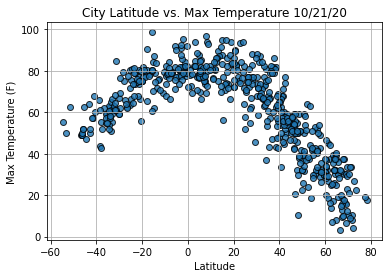

In [14]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

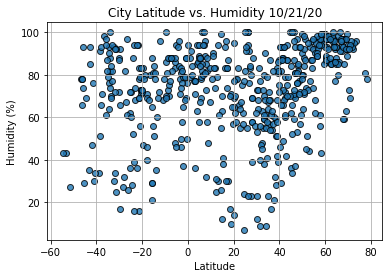

In [15]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

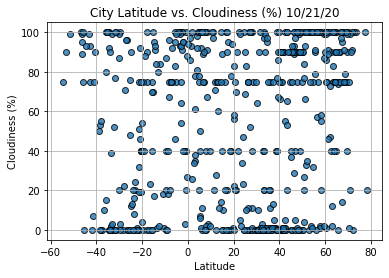

In [16]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

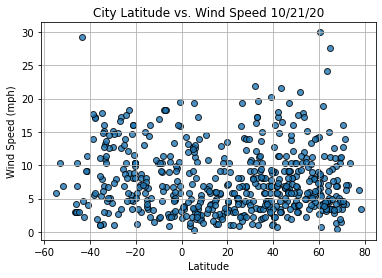

In [17]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [62]:
# Import linear regression from the SciPy stats module.
from scipy.stats import linregress

In [63]:
# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [64]:
index13 = city_data_df.loc[13]
index13

City                    Mahebourg
Country                        MU
Date          2020-10-21 19:29:02
Lat                        -20.41
Lng                          57.7
Max Temp                     75.2
Humidity                       73
Cloudiness                     40
Wind Speed                  10.29
Name: 13, dtype: object

In [65]:
city_data_df["Lat"] >= 0.

0       True
1      False
2      False
3      False
4      False
       ...  
547     True
548    False
549     True
550    False
551     True
Name: Lat, Length: 552, dtype: bool

In [66]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Broome,US,2020-10-21 19:29:09,42.25,-75.83,77.00,60,1,11.41
5,Tezpur,IN,2020-10-21 19:33:15,26.63,92.80,72.30,91,0,4.16
6,Sao Filipe,CV,2020-10-21 19:33:15,14.90,-24.50,83.34,63,89,4.94
7,Bogande,BF,2020-10-21 19:33:16,12.97,-0.14,89.47,30,60,4.21
10,Camacha,PT,2020-10-21 19:33:17,33.08,-16.33,66.20,59,20,17.22


In [67]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]
#northern_hemi_df.head(5)
#southern_hemi_df.head(5)

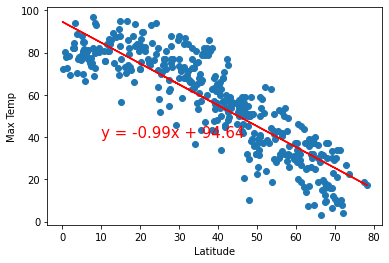

In [69]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for Max Temp', 'Max Temp',(10,40))

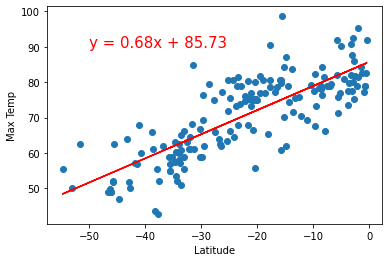

In [71]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for Max Temp', 'Max Temp',(-50,90))

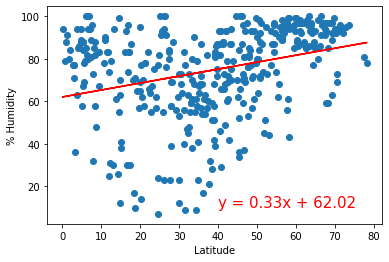

In [73]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for % Humidity', '% Humidity',(40,10))

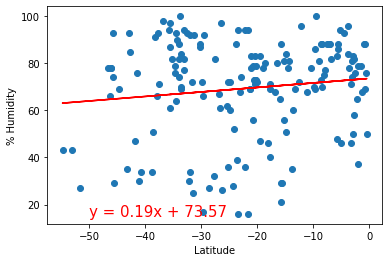

In [75]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for % Humidity', '% Humidity',(-50,15))

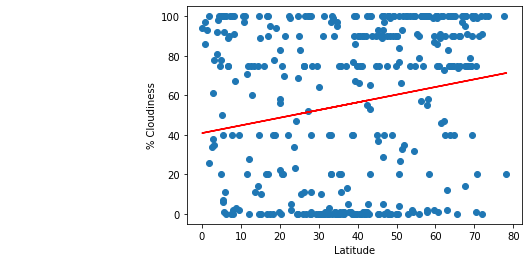

In [81]:
# Linear regression on the Northern Hemisphere for cloudiness
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for % Cloudiness', '% Cloudiness',(-50,60))

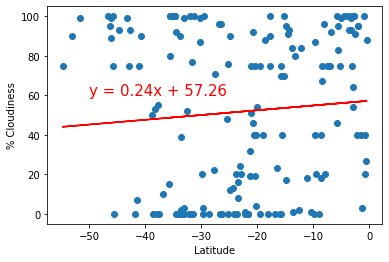

In [80]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for % Cloudiness', '% Cloudiness',(-50,60))

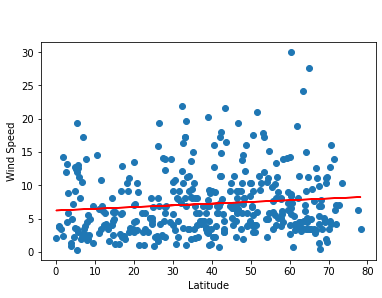

In [83]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for Wind Speed', 'Wind Speed',(40,35))

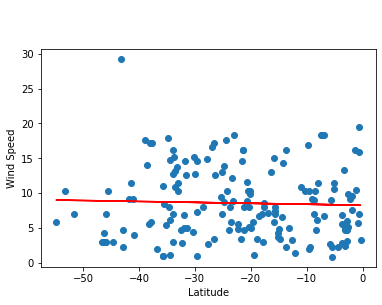

In [84]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for Wind Speed', 'Wind Speed',(-50,35))